In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [10]:
df = yf.download("^GSPC", start="2022-12-31")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000


In [11]:
supports = df[df.Low == df.Low.rolling(5, center=True).min()].Low
resistence = df[df.High == df.High.rolling(5, center=True).max()].High

In [12]:
levels= pd.concat([supports, resistence])

In [15]:
levels = levels[abs(levels.diff()) > 100]

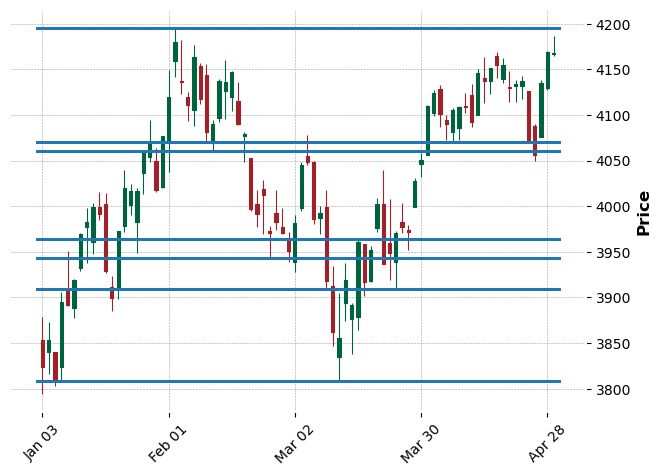

In [16]:
mpf.plot(df, type = 'candle', hlines = levels.to_list(), style = 'charles')

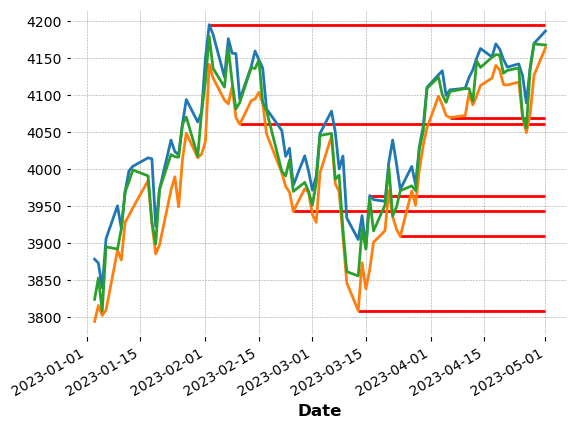

In [21]:
df.High.plot()
df.Low.plot()
df.Close.plot()
plt.hlines(levels,  xmin = levels.index, 
           xmax = df.index[-1], colors = 'r')
plt.show()